In [1]:
import pandas as pd  

In [2]:
df = pd.read_csv("insurance.csv")

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [7]:
df = df.replace({'smoker': {'yes': 1, 'no': 0}})

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,1,southwest,16884.92400
1,18.0,male,33.770,1,0,southeast,1725.55230
2,28.0,male,33.000,3,0,southeast,4449.46200
3,33.0,male,22.705,0,0,northwest,21984.47061
4,32.0,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,0,northwest,10600.54830
1334,18.0,female,31.920,0,0,northeast,2205.98080
1335,18.0,female,36.850,0,0,southeast,1629.83350
1336,21.0,female,25.800,0,0,southwest,2007.94500


# Transforming Strings "YES" or "NO" to 0 and 1 

In [9]:
df["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

# Head Part of the data 

In [40]:
df.head()

,age,bmi,children,smoker,charges
0,0.698662,0.257834,0.501195,0.053625,0.506441
1,0.488468,0.451655,0.808563,0.474627,0.335487
2,0.394515,0.879297,0.533573,0.834443,0.122300
3,0.529592,0.253304,0.720857,0.377283,0.707544
4,0.975211,0.788069,0.109205,0.424660,0.690916


# Tail Part of the Data 

In [41]:
df.tail()

,age,bmi,children,smoker,charges
5,0.910661,0.765068,0.619493,0.639695,0.799500
6,0.447046,0.000165,0.843056,0.789877,0.249954
7,0.975587,0.829994,0.856961,0.031171,0.036555
8,0.048555,0.062496,0.589033,0.607375,0.820205
9,0.052412,0.556603,0.521970,0.316952,0.257385


# Describing the data Means, STANDARD DEVIATION, MINIMUM AND MAXIMUM VALUES 

In [10]:
df.describe()

,age,bmi,children,smoker,charges
count,1334.000000,1336.000000,1338.000000,1338.000000,1338.000000
mean,39.206147,30.663866,1.094918,0.204783,13270.422265
std,14.070989,6.102741,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,26.250000,26.272500,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.700000,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


# Checking The Null Values 

In [11]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

age         0.002990
bmi         0.001495
sex         0.000000
children    0.000000
smoker      0.000000
region      0.000000
charges     0.000000
dtype: float64

# Imputing the null values with Median values 

In [18]:
from sklearn.impute import SimpleImputer
import numpy as np 
si=SimpleImputer(missing_values = np.nan, strategy="median")
si.fit(df[['age', 'bmi']])
  
#Filling missing data with median
df[['age', 'bmi']] = si.transform(df[['age', 'bmi']])

# Pairplot  

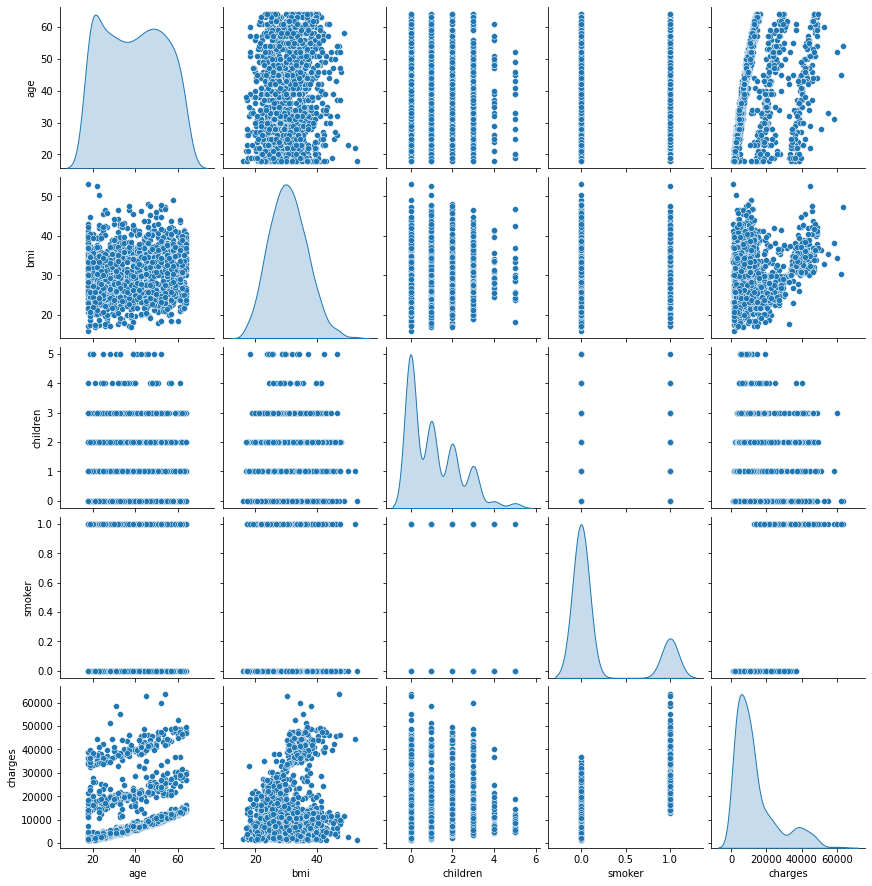

In [20]:
import seaborn as sns 
sns.pairplot(data=df, diag_kind='kde')

# BOX PLOT

<AxesSubplot:>

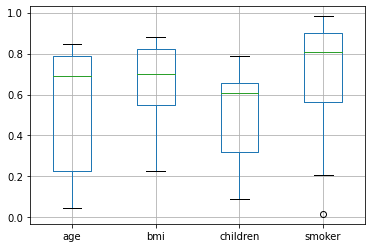

In [70]:
import matplotlib.pyplot as plt
#import lasio
df = pd.DataFrame(np.random.rand(10, 4), columns=['age', 'bmi', 'children', 'smoker'])
df.plot.box(grid='True')

# Skewness for the data 

In [28]:
print(df.skew())

age        -0.197212
bmi        -0.233391
children   -1.162326
smoker     -0.279399
charges    -0.021706
dtype: float64


# Kutosis for the data

In [33]:
print (df.kurt())

age        -1.007813
bmi        -1.605047
children    2.092712
smoker     -0.765956
charges    -1.692674
dtype: float64


# Standard deviation 

In [30]:
print(df.std())

age         0.341903
bmi         0.328274
children    0.222055
smoker      0.274992
charges     0.289683
dtype: float64


# Data Shape 

In [35]:
df.shape

(10, 5)

# Z Score

In [36]:
import scipy.stats as stats

In [37]:
stats.zscore(df)


array([[ 0.45194174, -0.72766131, -0.51835256, -1.53842951,  0.19580992],
       [-0.19608909, -0.1053003 ,  0.94072577,  0.07534576, -0.42625353],
       [-0.48574616,  1.26786191, -0.36465385,  1.454583  , -1.20199571],
       [-0.06930253, -0.74220768,  0.5243839 , -0.29779076,  0.92758303],
       [ 1.30454709,  0.97492782, -2.37912611, -0.11618785,  0.8670768 ],
       [ 1.10553852,  0.90107333,  0.04320905,  0.70808127,  1.26218954],
       [-0.3237944 , -1.55503818,  1.10446205,  1.28375327, -0.73748869],
       [ 1.30570526,  1.10954952,  1.17046866, -1.62449811, -1.51400192],
       [-1.55234684, -1.35489276, -0.10138566,  0.58419115,  1.33753037],
       [-1.54045359,  0.23168766, -0.41973125, -0.52904822, -0.71044981]])

In [39]:
df.apply(stats.zscore)

,age,bmi,children,smoker,charges
0,0.451942,-0.727661,-0.518353,-1.538430,0.195810
1,-0.196089,-0.105300,0.940726,0.075346,-0.426254
2,-0.485746,1.267862,-0.364654,1.454583,-1.201996
3,-0.069303,-0.742208,0.524384,-0.297791,0.927583
4,1.304547,0.974928,-2.379126,-0.116188,0.867077
5,1.105539,0.901073,0.043209,0.708081,1.262190
6,-0.323794,-1.555038,1.104462,1.283753,-0.737489
7,1.305705,1.109550,1.170469,-1.624498,-1.514002
8,-1.552347,-1.354893,-0.101386,0.584191,1.337530
9,-1.540454,0.231688,-0.419731,-0.529048,-0.710450


In [42]:
df.quantile(.1)

age         0.052027
bmi         0.056263
children    0.461996
smoker      0.051379
charges     0.113725
Name: 0.1, dtype: float64

In [43]:
df.quantile(.2)

age         0.326095
bmi         0.215142
children    0.517815
smoker      0.264287
charges     0.224423
Name: 0.2, dtype: float64

# Interquartile Range 25 percent, 50 percent , 75 percent

In [61]:
def interquartile_range(df):
    
    p75 = np.percentile(df, 75)  # 75th percentile
    p50 = np.percentile(df,50) # 50th perecentile 
    p25 = np.percentile(df, 25)  # 25th percentile
    iqr = p75 - p50 
    iqr1 = p50 - p25 # Interquartile Range
    return (iqr,iqr1)

In [62]:
interquartile_range(df)

(0.2565374761096768, 0.2531675830964413)

In [53]:
from scipy.stats import iqr
iqr(df['age'])

0.45001364463981336

In [54]:
from scipy.stats import iqr
iqr(df['bmi'])

0.5278822801398216

In [55]:
from scipy.stats import iqr
iqr(df['children'])

0.2617658350374785

In [56]:
from scipy.stats import iqr
iqr(df['smoker'])

0.2995800974863524

# Plotting the results of Interquartile Rsange of Each Feature 

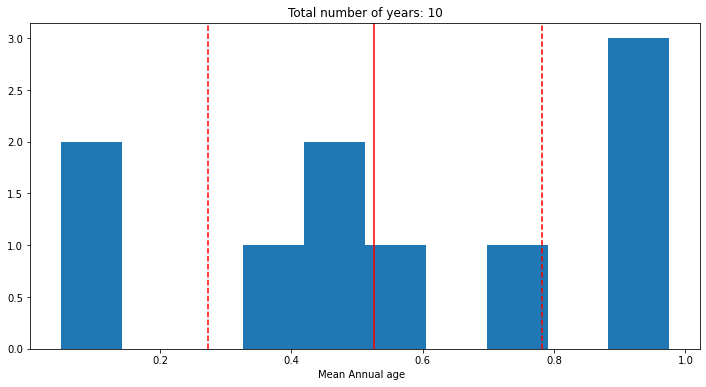

In [67]:
plt.figure(figsize=(12,6))
plt.hist(df['age'])
plt.title("Total number of years: %s" % len(df.index))
plt.xlabel("Mean Annual age  ")
# Vertical lines for each percentile of interest
plt.axvline(np.percentile(df, 25), linestyle='--', color='red')
plt.axvline(np.percentile(df, 50), linestyle='-',  color='red')
plt.axvline(np.percentile(df, 75), linestyle='--', color='red')
plt.show()

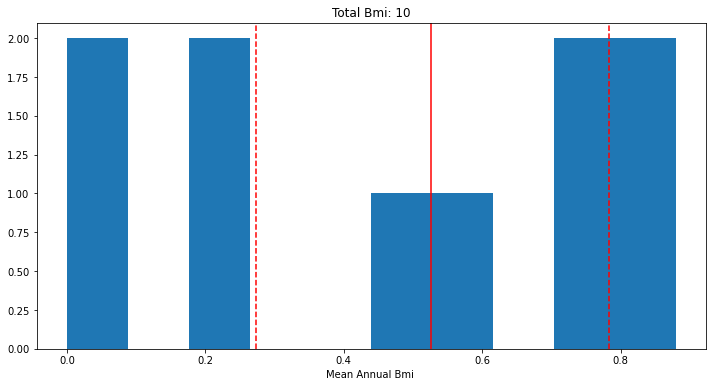

In [68]:
plt.figure(figsize=(12,6))
plt.hist(df['bmi'])
plt.title("Total Bmi: %s" % len(df.index))
plt.xlabel("Mean Annual Bmi ")
# Vertical lines for each percentile of interest
plt.axvline(np.percentile(df, 25), linestyle='--', color='red')
plt.axvline(np.percentile(df, 50), linestyle='-',  color='red')
plt.axvline(np.percentile(df, 75), linestyle='--', color='red')
plt.show()

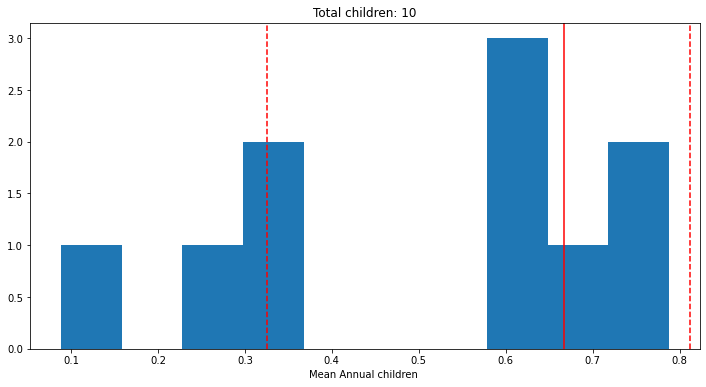

In [71]:
plt.figure(figsize=(12,6))
plt.hist(df['children'])
plt.title("Total children: %s" % len(df.index))
plt.xlabel("Mean Annual children ")
# Vertical lines for each percentile of interest
plt.axvline(np.percentile(df, 25), linestyle='--', color='red')
plt.axvline(np.percentile(df, 50), linestyle='-',  color='red')
plt.axvline(np.percentile(df, 75), linestyle='--', color='red')
plt.show()

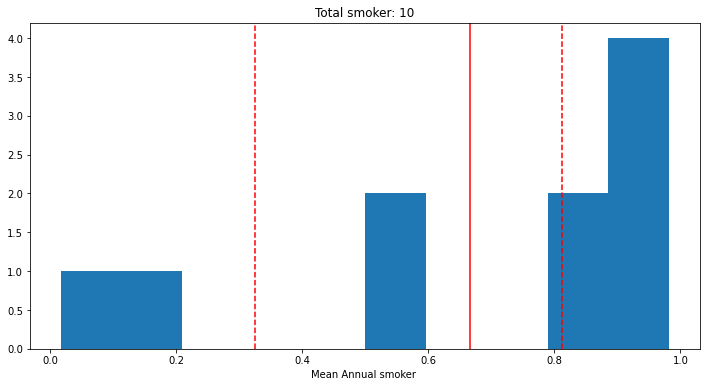

In [72]:
plt.figure(figsize=(12,6))
plt.hist(df['smoker'])
plt.title("Total smoker: %s" % len(df.index))
plt.xlabel("Mean Annual smoker ")
# Vertical lines for each percentile of interest
plt.axvline(np.percentile(df, 25), linestyle='--', color='red')
plt.axvline(np.percentile(df, 50), linestyle='-',  color='red')
plt.axvline(np.percentile(df, 75), linestyle='--', color='red')
plt.show()

# Correlation for the data

In [74]:
corr = df.corr()

In [75]:
corr


,age,bmi,children,smoker
age,1.000000,-0.606808,-0.432725,0.337959
bmi,-0.606808,1.000000,-0.004753,-0.357697
children,-0.432725,-0.004753,1.000000,-0.208763
smoker,0.337959,-0.357697,-0.208763,1.000000


# Plottting the correlation results in a pairplot

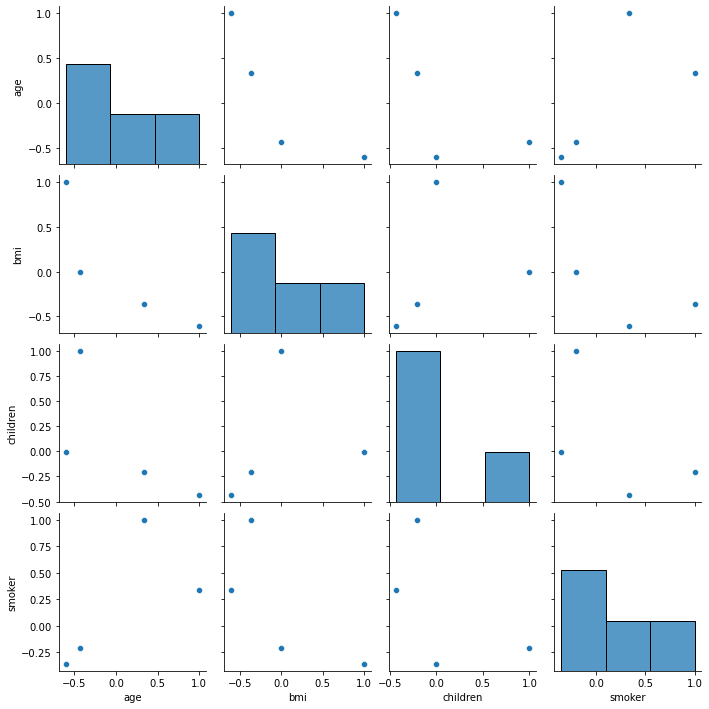

In [78]:
ax = sns.pairplot(corr)

# Heatmap for correlation 

<AxesSubplot:>

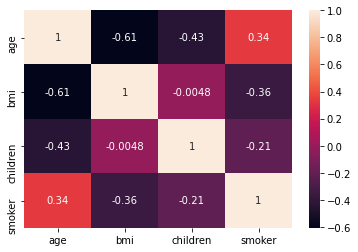

In [80]:
mat = matrix(rnorm(100), 10)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)